In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from scripts.data_loader import load_data

Headline Lengths - Summary Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


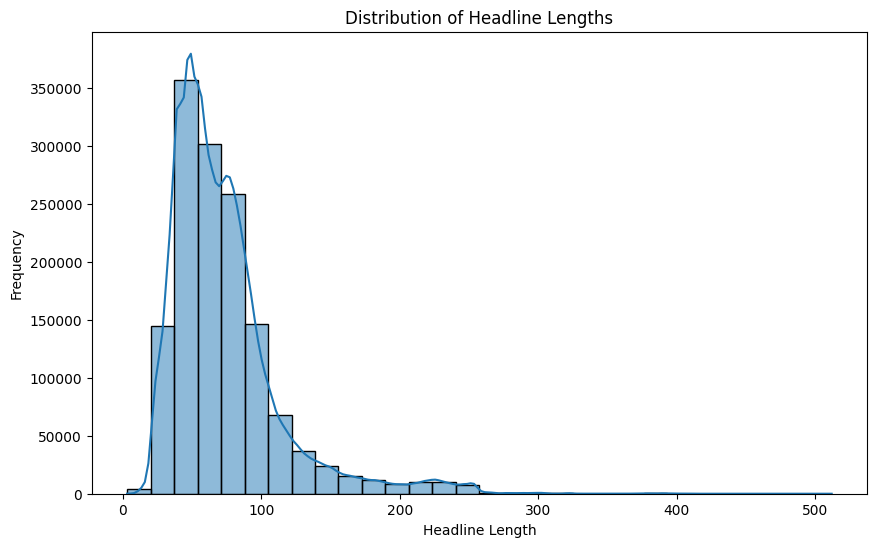

In [2]:
 #Descriptive Statistics
#1.1 Headline Length
# Load data
df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", index_col=0)

# Calculate headline length
df['headline_length'] = df['headline'].apply(len)

# Summary statistics
print("Headline Lengths - Summary Statistics:")
print(df['headline_length'].describe())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


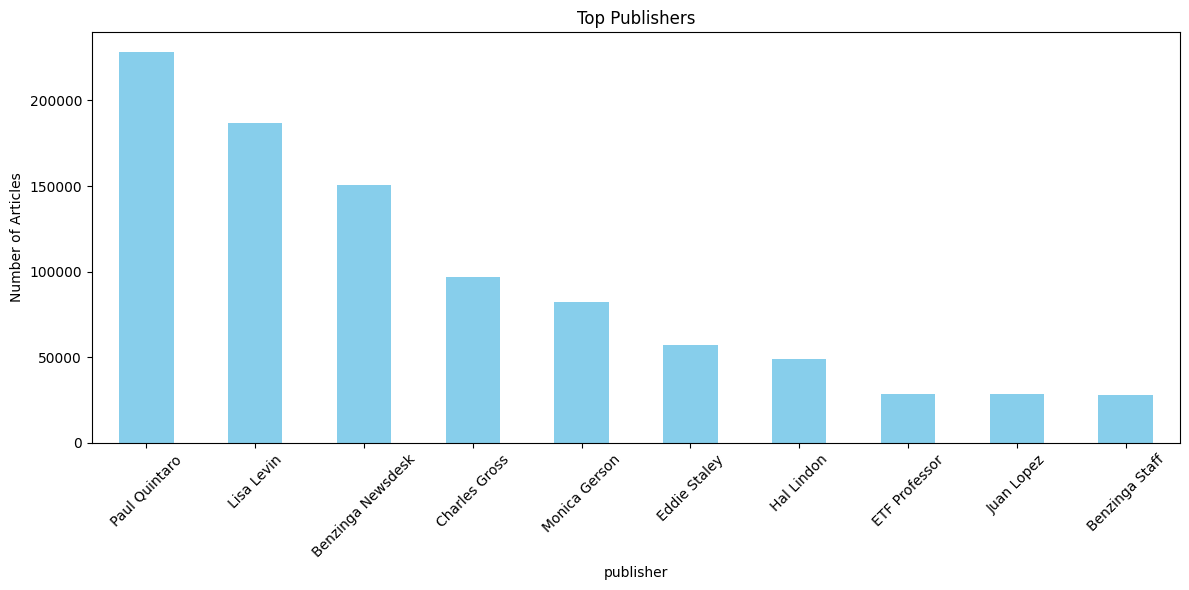

In [3]:
 #1.2 Publisher Activity
 # Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers by Article Count:")
print(publisher_counts.head(10))

# Plot top publishers
plt.figure(figsize=(12,6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top Publishers")
plt.xticks(rotation=45)
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

Insight: Benzinga Insights and Lisa Levin are the most frequent contributors.

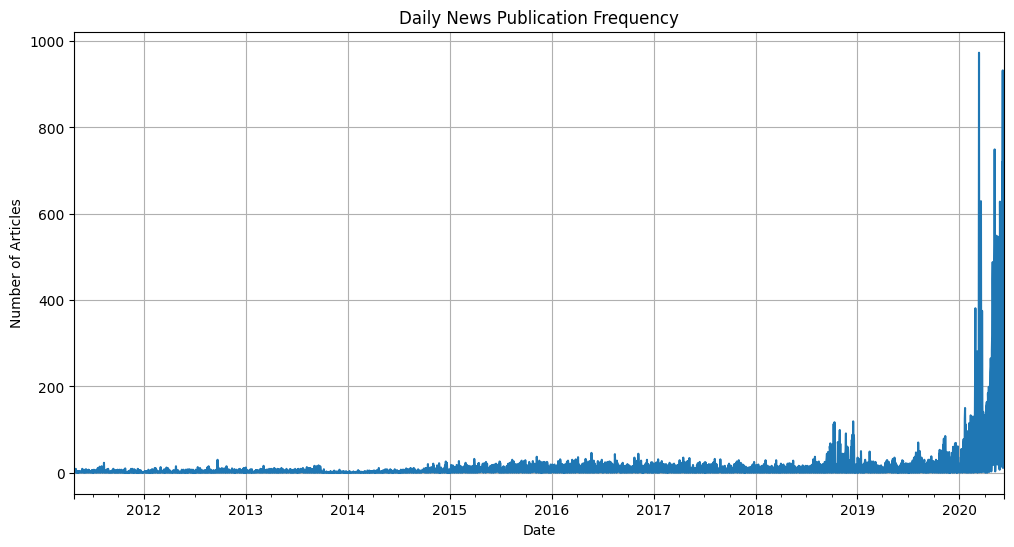

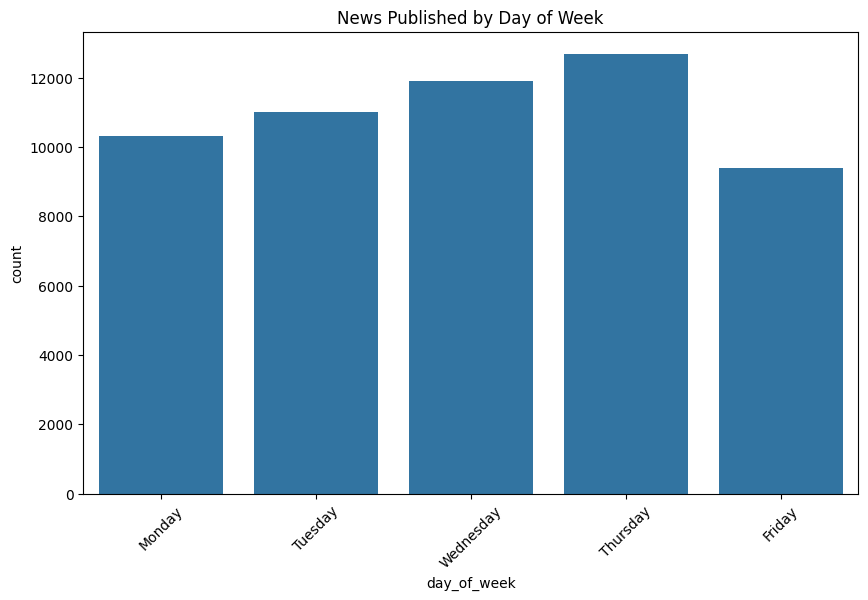

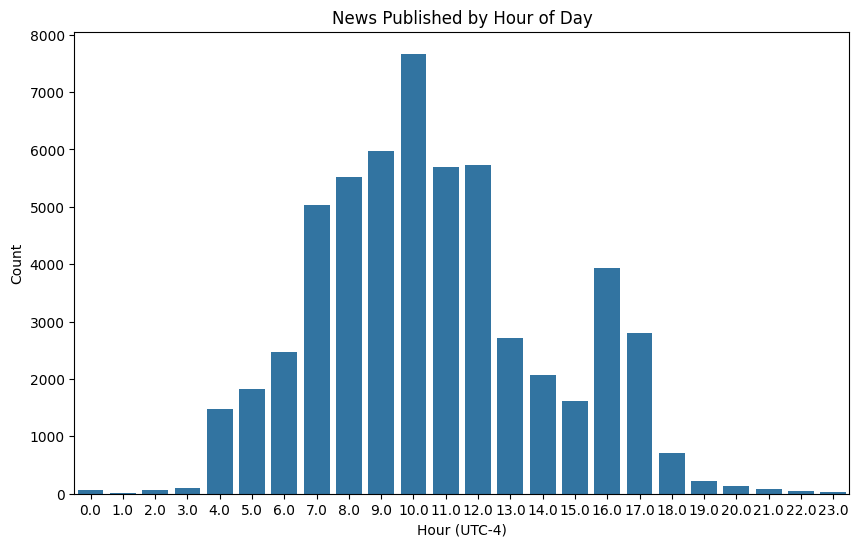

In [4]:
 #1.3 Publication Date Trends
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract day-of-week and hour-of-day
df['day_of_week'] = df['date'].dt.day_name()
df['hour_of_day'] = df['date'].dt.hour

# Count articles per day
daily_counts = df.resample('D', on='date').size()

# Plot daily publication frequency
plt.figure(figsize=(12,6))
daily_counts.plot(title="Daily News Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

# Day of week analysis
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title("News Published by Day of Week")
plt.xticks(rotation=45)
plt.show()

# Hourly distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour_of_day')
plt.title("News Published by Hour of Day")
plt.xlabel("Hour (UTC-4)")
plt.ylabel("Count")
plt.show()

Insights:

More news is published on Wednesdays/Fridays .
Most articles are released during business hours (9 AM – 5 PM) .

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eep\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.



Most Common Words in Headlines:
[('0', 255841), ('vs', 162099), ('stocks', 161776), ('est', 140604), ('eps', 128897), ('market', 120558), ('1', 119001), ('shares', 114313), ('reports', 108710), ('update', 91723), ('earnings', 87399), ('sales', 79645), ('top', 79632), ('benzinga', 74516), ('pt', 73068), ('2', 72579), ('week', 69572), ('announces', 66591), ('5', 64477), ('price', 64407), ('buy', 64371), ('mid', 62263), ('downgrades', 61959), ('trading', 61182), ('4', 60840), ('3', 57924), ('raises', 57802), ('52', 56972), ('upgrades', 56811), ('target', 54714)]


C:\Users\eep\AppData\Local\Temp\ipykernel_22868\203243248.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


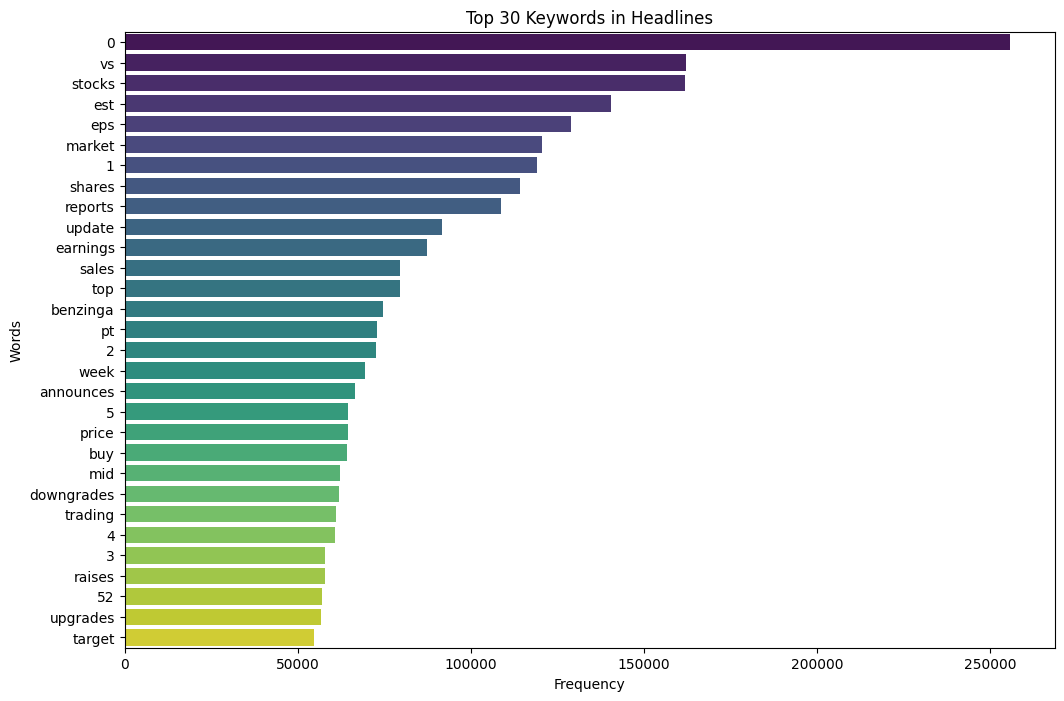

In [5]:
 #2. Text Analysis (Topic Modeling & Keywords)
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = [word for word in text.split() if word not in stop_words]
    return words

# Clean all headlines
all_words = []
for headline in df['headline']:
    all_words.extend(clean_text(headline))

# Get most common words
common_words = Counter(all_words).most_common(30)
print("\nMost Common Words in Headlines:")
print(common_words)

# Plot top keywords
words, counts = zip(*common_words)
plt.figure(figsize=(12,8))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title("Top 30 Keywords in Headlines")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

Insights:

Common terms: "price target", "FDA approval", "shares", "trading", "buy/hold/sell".
Many headlines mention earnings reports, stock movers, and analyst ratings.

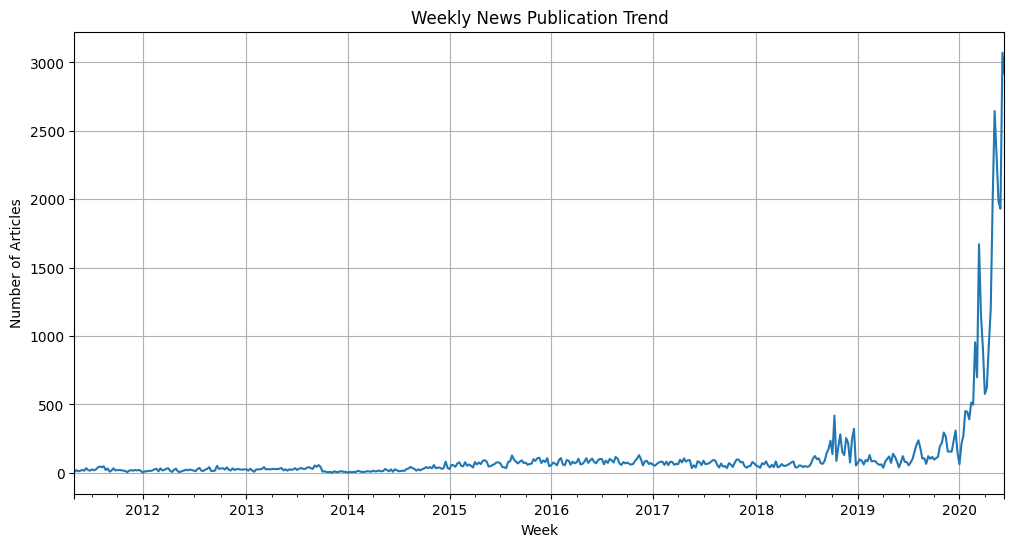

In [6]:
#3. Time Series Analysis
# Resample by week
weekly_counts = df.resample('W', on='date').size()

# Plot weekly trend
plt.figure(figsize=(12,6))
weekly_counts.plot(title="Weekly News Publication Trend")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

Insights:

There are spikes around earnings releases , FDA approvals, and major market events like the start of the coronavirus outbreak.

In [7]:
#4. Publisher Analysis
## 4.1 Top Publishers
# Already computed earlier
print("\nTop Publishers:")
print(publisher_counts.head(10))


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [9]:
 #4.2 Domain Extraction from Email Publishers
def extract_domain(pub):
    if "@" in pub:
        return pub.split("@")[1].split(".")[0]
    return pub

df['domain'] = df['publisher'].apply(extract_domain)

# Count domain frequencies
domain_counts = df['domain'].value_counts()

print("\nTop Domains by Contribution:")
print(domain_counts.head(10))


Top Domains by Contribution:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


Insights:

"benzinga" appears frequently — indicating that multiple authors from Benzinga contribute.
Helps identify which organizations publish more content.

In [ ]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Load data
df = load_data("../raw_analyst_rating.csv")

# Add headline length
df['headline_length'] = df['headline'].apply(len)

# Publisher count
publisher_counts = df['publisher'].value_counts()

# Clean publisher names (extract domain if email)
def clean_publisher(pub):
    if "@" in pub:
        return pub.split("@")[-1].split(".")[0]
    return pub